# Exploratory analysis of performance metrics across Majors

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Read the combined dataset and give general info
df = pd.read_csv('../data/processed/all_majors_combined.csv')
print("Dataset shape:", df.shape)
print("Total players:", df['player_name'].nunique())
print("Years covered: ", df['year'].min(), "-", df['year'].max())


Dataset shape: (1384, 21)
Total players: 337
Years covered:  2020 - 2025


In [3]:
# Metrics to analyze
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

# Group metrics by type
print("SCORING")
print(df.groupby('major')[['total_score']].agg(['mean', 'std', 'min', 'max']).round(3))
print("\n")

print("OFF THE TEE")
off_tee = ['distance', 'accuracy', 'sg_ott']
print(df.groupby('major')[off_tee].agg(['mean', 'std']).round(3))
print("\n")

print("APPROACH")
approach = ['sg_app', 'prox_fw', 'prox_rgh']
print(df.groupby('major')[approach].agg(['mean', 'std']).round(3))
print("\n")

print("AROUND THE GREEN")
short_game = ['sg_arg', 'scrambling']
print(df.groupby('major')[short_game].agg(['mean', 'std']).round(3))
print("\n")

print("PUTTING")
print(df.groupby('major')[['sg_putt']].agg(['mean', 'std']).round(3))
print("\n")

print("TEE TO GREEN")
tee_to_green = ['sg_bs', 'gir', 'sg_t2g']
print(df.groupby('major')[tee_to_green].agg(['mean', 'std']).round(3))
print("\n")

print("OVERALL PERFORMANCE")
overall = ['sg_total', 'great_shots', 'poor_shots']
print(df.groupby('major')[overall].agg(['mean', 'std']).round(3))
print("\n")


SCORING
                      total_score               
                             mean    std min max
major                                           
PGA Championship            0.933  6.709 -21  20
The Masters                 1.963  5.642 -12  17
The Open Championship      -0.340  7.341 -20  22
US Open                     7.199  6.433 -10  25


OFF THE TEE
                      distance         accuracy        sg_ott       
                          mean     std     mean    std   mean    std
major                                                               
PGA Championship       295.925  10.048    0.583  0.107  0.205  0.628
The Masters            297.818   9.306    0.727  0.075  0.135  0.618
The Open Championship  288.962  15.291    0.579  0.087  0.225  0.672
US Open                296.837   9.506    0.591  0.121  0.160  0.600


APPROACH
                      sg_app        prox_fw        prox_rgh        
                        mean    std    mean    std     mean     std
major

In [4]:
# Winning scores analysis (n°1)
winners = df[df['position'] == '1'].groupby('major')['total_score'].describe() 
print(winners.round(2))


                       count   mean   std   min    25%   50%    75%   max
major                                                                    
PGA Championship         6.0 -10.83  5.81 -21.0 -12.50 -10.0  -6.75  -5.0
The Masters              5.0 -10.80  0.84 -12.0 -11.00 -11.0 -10.00 -10.0
The Open Championship    4.0 -14.75  4.79 -20.0 -17.75 -15.0 -12.00  -9.0
US Open                  5.0  -5.80  3.19 -10.0  -6.00  -6.0  -6.00  -1.0


Us Open has the highest average winning score and The Open Championship the lowest
The Masters shows the most consistent scores with a std of 0.84 

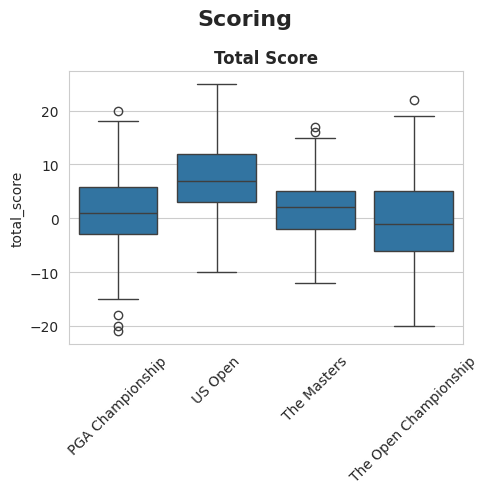

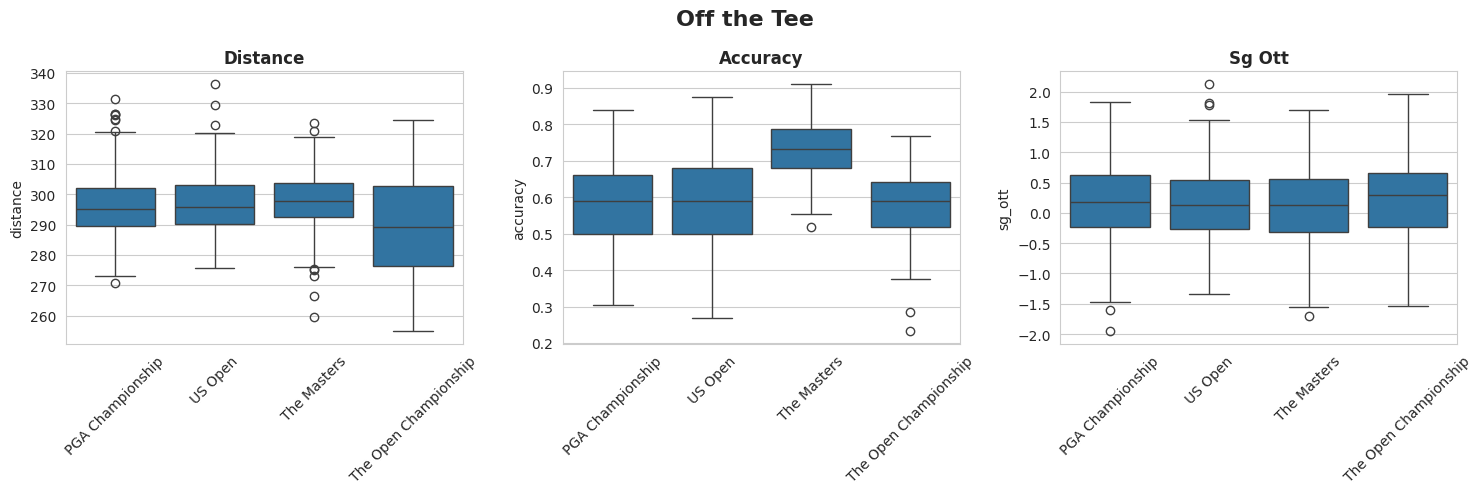

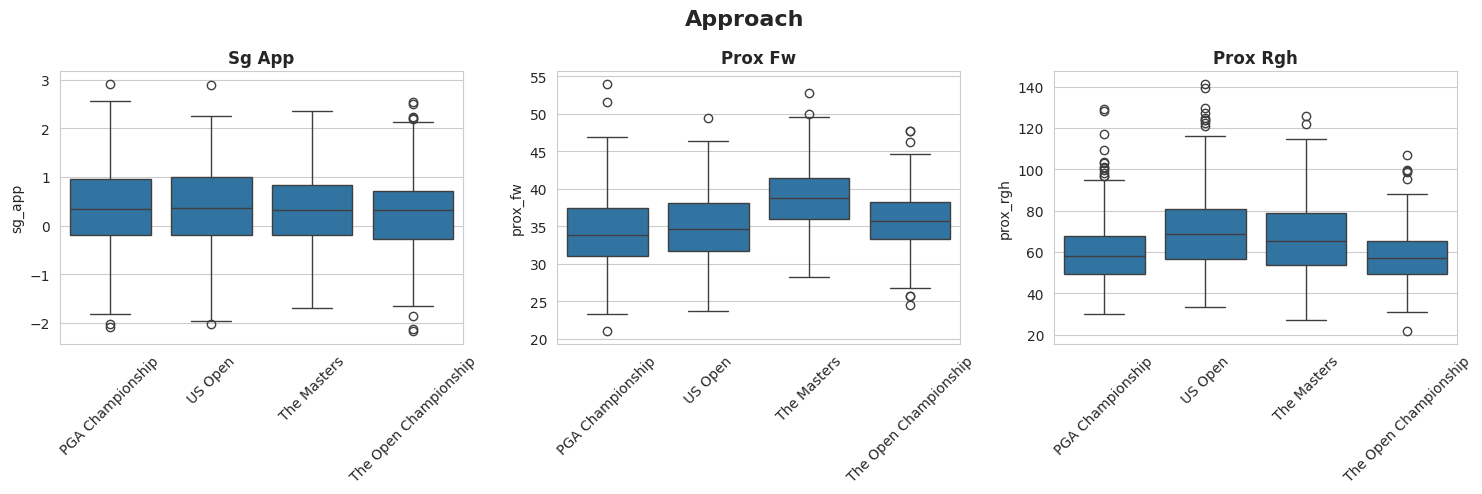

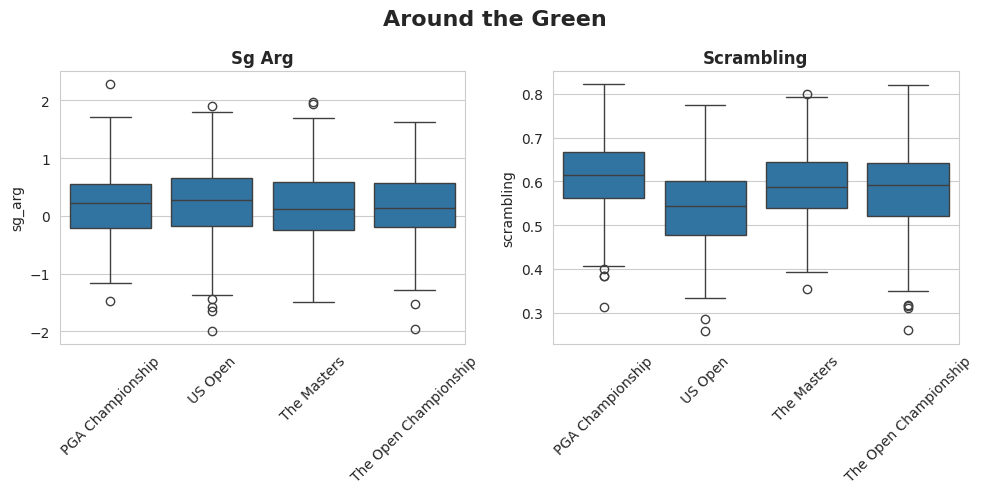

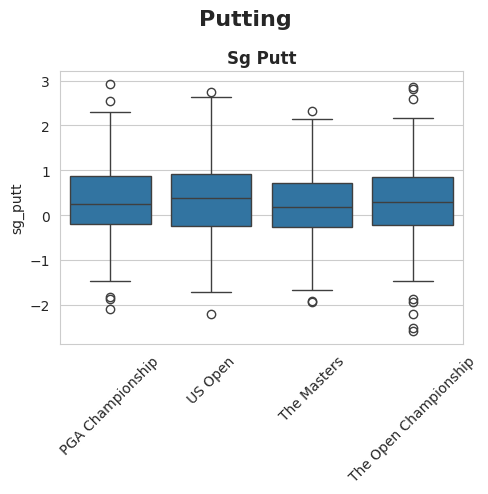

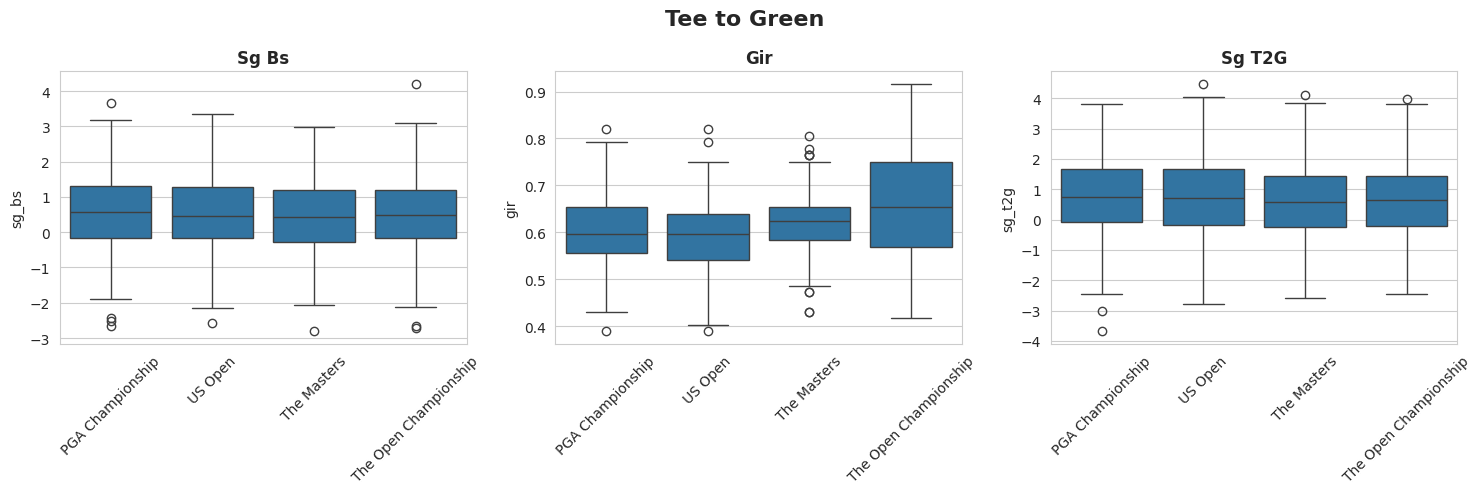

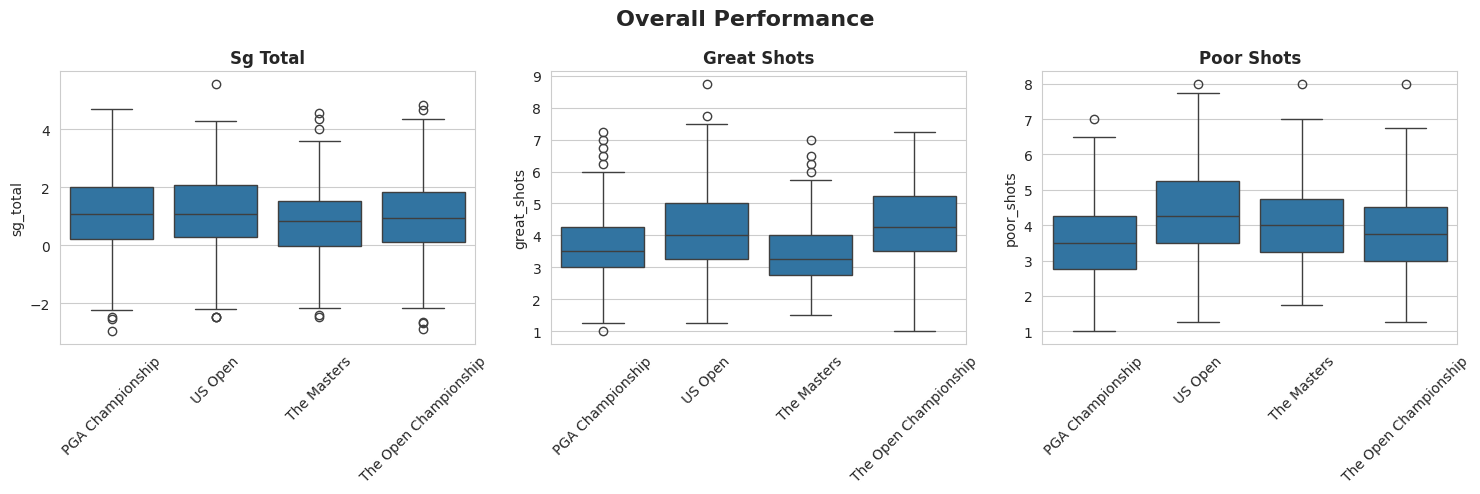

In [5]:
#Performance comparison
# Set style
# Set style
sns.set_style("whitegrid")

# Define metrics by category (matching your structure)
categories = {
    'Scoring': ['total_score'],
    'Off the Tee': ['distance', 'accuracy', 'sg_ott'],
    'Approach': ['sg_app', 'prox_fw', 'prox_rgh'],
    'Around the Green': ['sg_arg', 'scrambling'],
    'Putting': ['sg_putt'],
    'Tee to Green': ['sg_bs', 'gir', 'sg_t2g'],
    'Overall Performance': ['sg_total', 'great_shots', 'poor_shots']
}

# Create plots for each category
for category, metrics in categories.items():
    n_metrics = len(metrics)
    fig, axes = plt.subplots(1, n_metrics, figsize=(5*n_metrics, 5))
    fig.suptitle(f'{category}', fontsize=16, fontweight='bold')
    
    # Handle single metric (axes is not array)
    if n_metrics == 1:
        axes = [axes]
    
    for i, metric in enumerate(metrics):
        sns.boxplot(data=df, x='major', y=metric, ax=axes[i])
        axes[i].set_title(metric.replace('_', ' ').title(), fontweight='bold')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

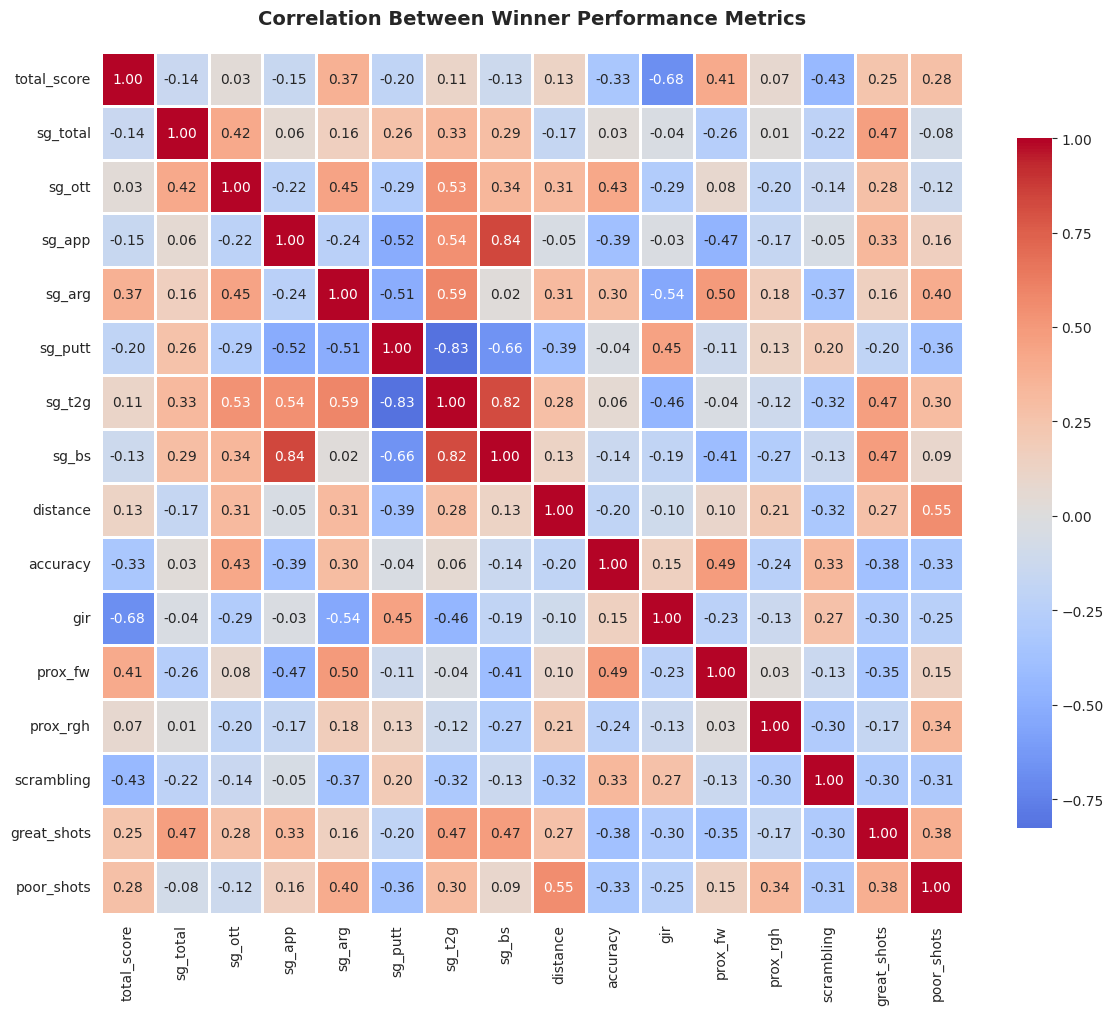

In [6]:
# Find the correlation between performance variables for winners

# Filter by winners
winners_data = df[df['position'] == '1']

# Include all metrics to compute correlation
winner_metrics = ['total_score', 'sg_total', 'sg_ott', 'sg_app', 'sg_arg', 'sg_putt', 
                  'sg_t2g', 'sg_bs', 'distance', 'accuracy', 'gir', 
                  'prox_fw', 'prox_rgh', 'scrambling', 'great_shots', 'poor_shots']

# Calculate correlation matrix
winner_corr = winners_data[winner_metrics].corr()

# Create a heatmap to visualize correlations
plt.figure(figsize=(12, 10))
sns.heatmap(winner_corr, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between Winner Performance Metrics', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Compare the top 25% vs the rest of the palyers based on total score (per tournament)

def get_tournament_percentile(group):
    """Calculate the 25th percentile of total score per tournament."""
    threshold = group['total_score'].quantile(0.25)
    group['is_top_25'] = group['total_score'] <= threshold
    return group

# Calculate the 25th percentile per tournament
df['tournament_25th_percentile'] = df.groupby(['major', 'year'])['total_score'].transform(lambda x: x.quantile(0.25))

# Mark the top 25%
df['is_top_25'] = df['total_score'] <= df['tournament_25th_percentile']

# Compare top 25% vs the rest
top_performers = df[df['is_top_25'] == True]
rest_of_field = df[df['is_top_25'] == False]
print(f"Top 25% per tournament: {len(top_performers)} players")
print(f"Rest of field: {len(rest_of_field)} players")

# Verify if the top 25% + the rest equals actual total players 
print(f"Verification: {len(top_performers)} + {len(rest_of_field)} = {len(top_performers) + len(rest_of_field)} (should equal {len(df)})")

# Compare performance variables
comparison_metrics = ['total_score', 'sg_total', 'sg_ott', 'sg_app', 'sg_arg', 'sg_putt', 'sg_t2g', 'sg_bs', 'distance', 'accuracy', 'gir', 'prox_fw', 'prox_rgh', 'scrambling', 'great_shots', 'poor_shots']
print("\nTop 25% average (across all tournaments):")
print(top_performers[comparison_metrics].mean().round(3))

print("\nRest of field average:")
print(rest_of_field[comparison_metrics].mean().round(3))

Top 25% per tournament: 395 players
Rest of field: 989 players
Verification: 395 + 989 = 1384 (should equal 1384)

Top 25% average (across all tournaments):
total_score     -4.025
sg_total         2.548
sg_ott           0.495
sg_app           0.881
sg_arg           0.461
sg_putt          0.713
sg_t2g           1.838
sg_bs            1.376
distance       297.502
accuracy         0.632
gir              0.661
prox_fw         34.197
prox_rgh        61.037
scrambling       0.630
great_shots      4.316
poor_shots       3.204
dtype: float64

Rest of field average:
total_score      4.934
sg_total         0.398
sg_ott           0.061
sg_app           0.128
sg_arg           0.080
sg_putt          0.131
sg_t2g           0.269
sg_bs            0.189
distance       293.951
accuracy         0.604
gir              0.601
prox_fw         36.402
prox_rgh        64.689
scrambling       0.566
great_shots      3.698
poor_shots       4.174
dtype: float64
